---

# Dask (read massive massive csv file)

---

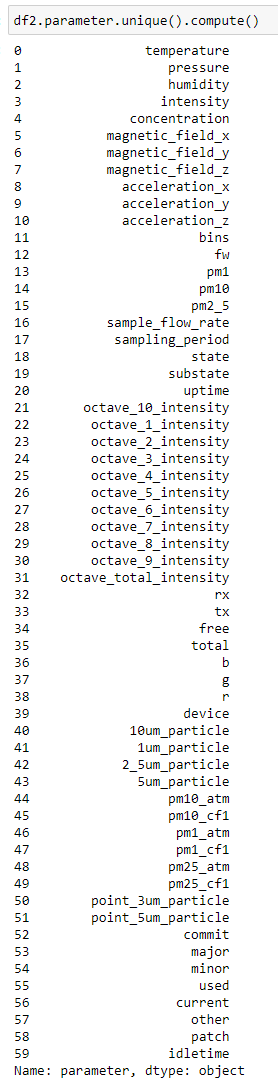

In [120]:
#   df.index.dtype
#   dtype('<M8[ns]')

###  Examining huge dataset:

In [2]:
%pwd

'D:\\CRITICAL_MAIN_DATAFILE__MILESTONE_II\\AoT_Chicago.complete.2021-09-12'

In [187]:
#  you have to be here:
#     Directory of D:\CRITICAL_MAIN_DATAFILE__MILESTONE_II\AoT_Chicago.complete.2021-09-12
#     or this won't work 

In [3]:
# file size 

! dir data.csv   
# 311,296,394,924 bytes

 Volume in drive D is New Volume
 Volume Serial Number is A060-E317

 Directory of D:\CRITICAL_MAIN_DATAFILE__MILESTONE_II\AoT_Chicago.complete.2021-09-12

09/11/2021  08:20 PM   311,296,394,924 data.csv
               1 File(s) 311,296,394,924 bytes
               0 Dir(s)  909,425,348,608 bytes free


In [4]:
import dask 
import dask.dataframe as dd
from dask.distributed import Client, progress
# dask.set_options(get=dask.multiprocessing.get)

import pandas as pd 

# client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client = Client()
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Status: running,Using processes: True
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 24,Total memory: 63.95 GiB
Comm: tcp://127.0.0.1:65381,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 24
Started: Just now,Total memory: 63.95 GiB
Comm: tcp://127.0.0.1:65434,Total threads: 4
Dashboard: http://127.0.0.1:65435/status,Memory: 10.66 GiB
Nanny: tcp://127.0.0.1:65384,


In [5]:
print(client)

<Client: 'tcp://127.0.0.1:65381' processes=6 threads=24, memory=63.95 GiB>


In [6]:
client.status

'running'

In [7]:
client.has_what()

Worker,Key count,Key list
tcp://127.0.0.1:65419,0,Expand
tcp://127.0.0.1:65420,0,Expand
tcp://127.0.0.1:65425,0,Expand
tcp://127.0.0.1:65428,0,Expand
tcp://127.0.0.1:65431,0,Expand
tcp://127.0.0.1:65434,0,Expand


In [8]:
client.dashboard_link

'http://127.0.0.1:8787/status'

In [9]:
type(client)

distributed.client.Client

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# help(dd.read_csv)

In [11]:
# from dask import dataframe as dd
# start = time.time()
# dask_df = dd.read_csv('huge_data.csv')
# end = time.time()
# print("Read csv with dask: ",(end-start),"sec")
# Read csv with dask:  0.07900428771972656 sec

Why DASK is better than PANDAS?
Pandas utilizes a single CPU core while Dask utilizes multiple CPU cores by internally chunking dataframe and process in parallel. In simple words, multiple small dataframes of a large dataframe got processed at a time wherein under pandas, operating a single large dataframe takes a long time to run.
DASK can handle large datasets on a single CPU exploiting its multiple cores or cluster of machines refers to distributed computing. It provides a sort of scaled pandas and numpy libraries.
Not only dataframe, dask also provides array and scikit-learn libraries to exploit parallelism.

In [12]:

# dd.read_csv?

# Signature:
# dd.read_csv(
#     urlpath,
#     blocksize='default',
#     lineterminator=None,
#     compression='infer',
#     sample=256000,
#     sample_rows=10,
#     enforce=False,
#     assume_missing=False,
#     storage_options=None,
#     include_path_column=False,
#     **kwargs,
# )
# Docstring:
# Read CSV files into a Dask.DataFrame

# This parallelizes the :func:`pandas.read_csv` function in the following ways:

# - It supports loading many files at once using globstrings:

#     >>> df = dd.read_csv('myfiles.*.csv')  # doctest: +SKIP

# - In some cases it can break up large files:

#     >>> df = dd.read_csv('largefile.csv', blocksize=25e6)  # 25MB chunks  # doctest: +SKIP

# - It can read CSV files from external resources (e.g. S3, HDFS) by
#   providing a URL:

#     >>> df = dd.read_csv('s3://bucket/myfiles.*.csv')  # doctest: +SKIP
#     >>> df = dd.read_csv('hdfs:///myfiles.*.csv')  # doctest: +SKIP
#     >>> df = dd.read_csv('hdfs://namenode.example.com/myfiles.*.csv')  # doctest: +SKIP

    
# Internally ``dd.read_csv`` uses :func:`pandas.read_csv` and supports many of the
# same keyword arguments with the same performance guarantees. See the docstring
# for :func:`pandas.read_csv` for more information on available keyword arguments.

# Parameters
# ----------
# urlpath : string or list
#     Absolute or relative filepath(s). Prefix with a protocol like ``s3://``
#     to read from alternative filesystems. To read from multiple files you
#     can pass a globstring or a list of paths, with the caveat that they
#     must all have the same protocol.
# blocksize : str, int or None, optional
#     Number of bytes by which to cut up larger files. Default value is computed
#     based on available physical memory and the number of cores, up to a maximum
#     of 64MB. Can be a number like ``64000000` or a string like ``"64MB"``. If
#     ``None``, a single block is used for each file.
# sample : int, optional
#     Number of bytes to use when determining dtypes
# assume_missing : bool, optional
#     If True, all integer columns that aren't specified in ``dtype`` are assumed
#     to contain missing values, and are converted to floats. Default is False.
# storage_options : dict, optional
#     Extra options that make sense for a particular storage connection, e.g.
#     host, port, username, password, etc.
# include_path_column : bool or str, optional
#     Whether or not to include the path to each particular file. If True a new
#     column is added to the dataframe called ``path``. If str, sets new column
#     name. Default is False.
    
# - Provide explicit dtypes for the offending columns using the ``dtype``
#   keyword. This is the recommended solution.

                            

In [13]:
filename = 'data.csv'

df = dd.read_csv(filename,  
                 blocksize=25e6, 
                 dtype={'value_raw': 'object'})

# on client

# figure out this dtype issue ! 
# i need to determine how the heck to read this with importing right dtypes right away
# i have issues with various options ! 
# had to do a work around because there was some gibberish in value_raw col i believe 

# add later:    .set_index('timestamp')
#assume_missing=True, )
# dtype={'value_raw': 'float64'})
# dtype={'value_hrf': 'float64', 
#         'value_raw': 'float64'}, 
# parse_dates=['timestamp'])              
# DONT NEED:  df = df.set_index('timestamp')    

In [14]:
df.known_divisions  # really really important ! 

False

In [15]:
df.dtypes

# i need timestamp to be correct ! i dont want all strings etc !
# need to split this file as well ! 

timestamp    object
node_id      object
subsystem    object
sensor       object
parameter    object
value_raw    object
value_hrf    object
dtype: object

In [16]:
# you will want to make sure everyone is using the right dtypes ! 

In [17]:
#  df['timestamp'] = pd.to_datetime(df['timestamp'])

In [18]:
# df['Date'] = df['Date'].astype('datetime64[ns]')

In [19]:
type(df)

dask.dataframe.core.DataFrame

In [20]:
df.columns

Index(['timestamp', 'node_id', 'subsystem', 'sensor', 'parameter', 'value_raw',
       'value_hrf'],
      dtype='object')

In [21]:
# parse_dates=['Date']

# df = df.astype({"timestamp": object, 
#                 "node_id": object, 
#                 "subsystem": object, 
#                 "sensor": object, 
#                 "parameter": object, 
#                 "value_raw": float, 
#                 "value_hrf": float})

In [22]:
# df.head(20)
# remember, timestamp is in string format I believe
# NOTE:
#   -  timestamp appears to be in right form, but not truly timestamp ns format i believe

In [23]:
df.timestamp = df.timestamp.astype('M8[us]')

In [24]:
df.dtypes

timestamp    datetime64[ns]
node_id              object
subsystem            object
sensor               object
parameter            object
value_raw            object
value_hrf            object
dtype: object

In [25]:
df.head(10)

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2018-01-01 00:00:06,001e0610e532,chemsense,at0,temperature,-1106,-11.06
1,2018-01-01 00:00:06,001e0610e532,chemsense,at1,temperature,-1077,-10.77
2,2018-01-01 00:00:06,001e0610e532,chemsense,at2,temperature,-1009,-10.09
3,2018-01-01 00:00:06,001e0610e532,chemsense,at3,temperature,-972,-9.72
4,2018-01-01 00:00:06,001e0610e532,chemsense,chemsense,id,NaN,541eec3ebfa6
5,2018-01-01 00:00:06,001e0610e532,chemsense,co,concentration,2068,NaN
6,2018-01-01 00:00:06,001e0610e532,chemsense,h2s,concentration,-345,NaN
7,2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,pressure,101939,1019.39
8,2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,temperature,-954,-9.54
9,2018-01-01 00:00:06,001e0610e532,chemsense,no2,concentration,649,NaN


In [26]:
df.tail(100)

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
287058,2021-03-22 05:17:27,001e0610ee36,metsense,htu21d,temperature,22628,13.82
287059,2021-03-22 05:17:27,001e0610ee36,metsense,metsense,id,011cd1141800,011cd1141800
287060,2021-03-22 05:17:27,001e0610ee36,metsense,mma8452q,acceleration_x,65200,-20.508
287061,2021-03-22 05:17:27,001e0610ee36,metsense,mma8452q,acceleration_y,49392,-985.352
287062,2021-03-22 05:17:27,001e0610ee36,metsense,mma8452q,acceleration_z,65520,-0.977
287063,2021-03-22 05:17:27,001e0610ee36,metsense,pr103j2,temperature,760,14.25
287064,2021-03-22 05:17:27,001e0610ee36,metsense,spv1840lr5h_b,intensity,NaN,56.72
287065,2021-03-22 05:17:27,001e0610ee36,metsense,tmp112,temperature,1817,14.19
287066,2021-03-22 05:17:27,001e0610ee36,metsense,tsl250rd,intensity,0,0.0
287067,2021-03-22 05:17:27,001e0610ee36,metsense,tsys01,temperature,9496352,14.47


In [ ]:
# number of unique sensors:
# 5259	2021-03-22 05:18:49	001e0610fb4c	metsense	metsense	id	000017e2bfa2	000017e2bfa2

In [27]:
# df = client.persist(df)  # triggers computation asynchronously

In [ ]:
#  from dask.distributed import wait
#  wait(df)  # blocks until read is done

In [30]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 7 entries, timestamp to value_hrf
dtypes: datetime64[ns](1), object(6)

In [34]:
type(df)

dask.dataframe.core.DataFrame

In [35]:
df.columns

Index(['timestamp', 'node_id', 'subsystem', 'sensor', 'parameter', 'value_raw',
       'value_hrf'],
      dtype='object')

In [37]:
# dask operation
# df = df.drop('value_raw', axis=1)
new_df = df.drop('value_raw', axis=1).copy()
new_df.columns

Index(['timestamp', 'node_id', 'subsystem', 'sensor', 'parameter',
       'value_hrf'],
      dtype='object')

In [38]:

new_df.dtypes


timestamp    datetime64[ns]
node_id              object
subsystem            object
sensor               object
parameter            object
value_hrf            object
dtype: object

In [122]:
# should have set your dtypes right here ! 

In [48]:

new_df = new_df.set_index('timestamp', sorted=True)


In [69]:

new_df.npartitions


12452

In [124]:
# new_df.isna().sum(axis=0).compute()

### In theory, this dask dataframe is now indexed, in theory should be faster...

In [52]:
# dir(df)

#  'abs',
#  'add',
#  'add_prefix',
#  'add_suffix',
#  'align',
#  'all',
#  'any',
#  'append',
#  'apply',
#  'applymap',
#  'assign',
#  'astype',
#  'attrs',
#  'bfill',
#  'categorize',
#  'clear_divisions',
#  'clip',
#  'clip_lower',
#  'clip_upper',
#  'columns',
#  'combine',
#  'combine_first',
#  'compute',
#  'copy',
#  'corr',
#  'count',
#  'cov',
#  'cummax',
#  'cummin',
#  'cumprod',
#  'cumsum',
#  'dask',
#  'describe',
#  'diff',
#  'div',
#  'divide',
#  'divisions',
#  'dot',
#  'drop',
#  'drop_duplicates',
#  'dropna',
#  'dtypes',
#  'empty',
#  'eq',
#  'eval',
#  'explode',
#  'ffill',
#  'fillna',
#  'first',
#  'floordiv',
#  'ge',
#  'get_dtype_counts',
#  'get_ftype_counts',
#  'get_partition',
#  'groupby',
#  'gt',
#  'head',
#  'idxmax',
#  'idxmin',
#  'iloc',
#  'index',
#  'info',
#  'isin',
#  'isna',
#  'isnull',
#  'items',
#  'iterrows',
#  'itertuples',
#  'join',
#  'known_divisions',
#  'kurtosis',
#  'last',
#  'le',
#  'loc',
#  'lt',
#  'map_overlap',
#  'map_partitions',
#  'mask',
#  'max',
#  'mean',
#  'melt',
#  'memory_usage',
#  'memory_usage_per_partition',
#  'merge',
#  'min',
#  'mod',
#  'mode',
#  'mul',
#  'ndim',
#  'ne',
#  'nlargest',
#  'node_id',
#  'notnull',
#  'npartitions',
#  'nsmallest',
#  'nunique_approx',
#  'parameter',
#  'partitions',
#  'persist',
#  'pipe',
#  'pivot_table',
#  'pop',
#  'pow',
#  'prod',
#  'product',
#  'quantile',
#  'query',
#  'radd',
#  'random_split',
#  'rdiv',
#  'reduction',
#  'rename',
#  'repartition',
#  'replace',
#  'resample',
#  'reset_index',
#  'rfloordiv',
#  'rmod',
#  'rmul',
#  'rolling',
#  'round',
#  'rpow',
#  'rsub',
#  'rtruediv',
#  'sample',
#  'select_dtypes',
#  'sem',
#  'sensor',
#  'set_index',
#  'shape',
#  'shift',
#  'shuffle',
#  'size',
#  'skew',
#  'sort_values',
#  'squeeze',
#  'std',
#  'sub',
#  'subsystem',
#  'sum',
#  'tail',
#  'timestamp',
#  'to_bag',
#  'to_csv',
#  'to_dask_array',
#  'to_delayed',
#  'to_hdf',
#  'to_html',
#  'to_json',
#  'to_parquet',
#  'to_records',
#  'to_sql',
#  'to_string',
#  'to_timestamp',
#  'truediv',
#  'value_hrf',
#  'value_raw',
#  'values',
#  'var',
#  'visualize',
#  'where']
    

In [121]:
# two months of filter here ! 

In [200]:

df1 = new_df.loc['2018-01-01':'2018-02-28'].copy()  # this is very fast if you have an index


In [201]:

# df1.map_partitions(type).compute()
# 200 partitions now...


In [202]:

df1.isna().sum(axis=0).compute()


node_id            0
subsystem          0
sensor             0
parameter          0
value_hrf    7668782
dtype: int64

In [203]:

# dropping missing values ! (which will be value_hrf periodically)
df1 = df1.dropna(subset=['value_hrf'])


In [204]:

df1.isna().sum(axis=0).compute()


node_id      0
subsystem    0
sensor       0
parameter    0
value_hrf    0
dtype: int64

In [205]:
# accessing the first partition (df)
# dask_df.partitions[1].compute()

In [206]:

df1.dtypes


node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [207]:
df1.map_partitions(len).compute()

0      298197
1      298161
2      302157
3      303723
4      322603
5      313913
6      312274
7      311085
8      312723
9      312642
10     312984
11     314802
12     313145
13     315324
14     314901
15     316746
16     317052
17     315873
18     317268
19     314613
20     313326
21     306837
22     305908
23     306100
24     303283
25     300029
26     297234
27     294466
28     296200
29     295496
30     291650
31     293944
32     293239
33     292211
34     294548
35     304181
36     314006
37     311603
38     308385
39     313037
40     317398
41     311896
42     311829
43     310704
44     314257
45     313141
46     311227
47     311775
48     311164
49     309495
50     311353
51     310005
52     308607
53     309761
54     306534
55     304735
56     307487
57     306925
58     309093
59     308144
60     305863
61     307715
62     307200
63     306586
64     308560
65     306850
66     307513
67     308523
68     307370
69     309376
70     307090
71    

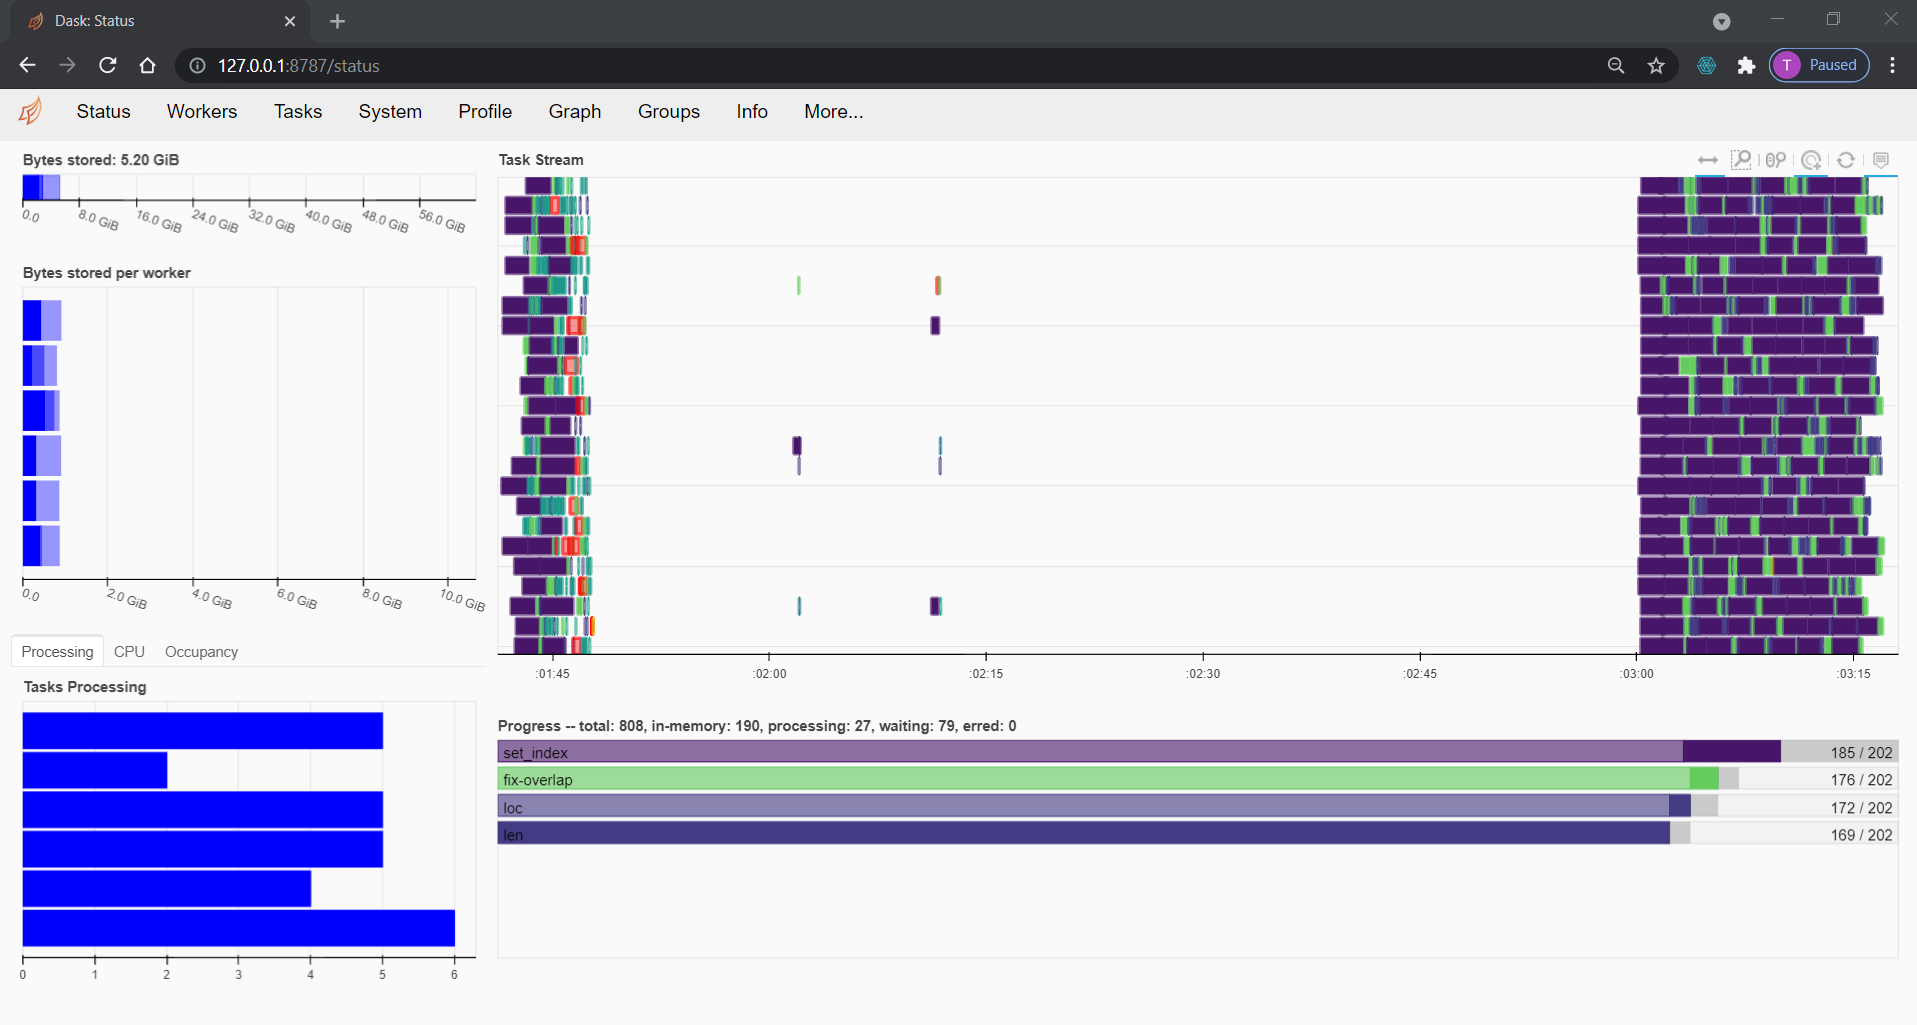

In [208]:

# df = df[(df.A > 3) & (df.A <= 1000)]
df2 = df1[df1['parameter'] !='id'].copy()


In [209]:

df2.head(10)


,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,at0,temperature,-11.06
2018-01-01 00:00:06,001e0610e532,chemsense,at1,temperature,-10.77
2018-01-01 00:00:06,001e0610e532,chemsense,at2,temperature,-10.09
2018-01-01 00:00:06,001e0610e532,chemsense,at3,temperature,-9.72
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,pressure,1019.39
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,temperature,-9.54
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,humidity,49.93
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,temperature,-10.82
2018-01-01 00:00:06,001e0610e532,lightsense,apds_9006_020,intensity,0.322


In [210]:
df2.known_divisions  # really really important !  based on index now ! 

True

In [211]:
# df2.head(100)

In [212]:
len(df2) # 57 330 461  i.e. ~ 57M rows...

57330461

In [213]:
len(df2.node_id.unique())  # important to understand, at this point, there were only 44 sensors, 
#  butttt thats actually better, its manageable

44

In [214]:
df2.dtypes

node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [215]:
df2.parameter.unique().compute()

# 0                temperature
# 1                   pressure
# 2                   humidity
# 3                  intensity
# 4              concentration
# 5           magnetic_field_x
# 6           magnetic_field_y
# 7           magnetic_field_z
# 8             acceleration_x
# 9             acceleration_y
# 10            acceleration_z
# 11                      bins
# 12                        fw
# 13                       pm1
# 14                      pm10
# 15                     pm2_5
# 16          sample_flow_rate
# 17           sampling_period
# 18                     state
# 19                  substate
# 20                    uptime
# 21       octave_10_intensity
# 22        octave_1_intensity
# 23        octave_2_intensity
# 24        octave_3_intensity
# 25        octave_4_intensity
# 26        octave_5_intensity
# 27        octave_6_intensity
# 28        octave_7_intensity
# 29        octave_8_intensity
# 30        octave_9_intensity
# 31    octave_total_intensity
# 32                        rx
# 33                        tx
# 34                      free
# 35                     total
# 36                         b
# 37                         g
# 38                         r
# 39                    device
# 40             10um_particle
# 41              1um_particle
# 42            2_5um_particle
# 43              5um_particle
# 44                  pm10_atm
# 45                  pm10_cf1
# 46                   pm1_atm
# 47                   pm1_cf1
# 48                  pm25_atm
# 49                  pm25_cf1
# 50        point_3um_particle
# 51        point_5um_particle
# 52                    commit
# 53                     major
# 54                     minor
# 55                      used
# 56                   current
# 57                     other
# 58                     patch
# 59                  idletime
# Name: parameter, dtype: object
        

0                temperature
1                   pressure
2                   humidity
3                  intensity
4              concentration
5           magnetic_field_x
6           magnetic_field_y
7           magnetic_field_z
8             acceleration_x
9             acceleration_y
10            acceleration_z
11                      bins
12                        fw
13                       pm1
14                      pm10
15                     pm2_5
16          sample_flow_rate
17           sampling_period
18                     state
19                  substate
20                    uptime
21       octave_10_intensity
22        octave_1_intensity
23        octave_2_intensity
24        octave_3_intensity
25        octave_4_intensity
26        octave_5_intensity
27        octave_6_intensity
28        octave_7_intensity
29        octave_8_intensity
30        octave_9_intensity
31    octave_total_intensity
32                        rx
33                        tx
34            

In [216]:

# df2['value_hrf'] = df2['value_hrf'].astype(float)
# df2.dtypes


In [217]:

# df2['value_hrf'] = df2['value_hrf'].astype(object)
# df2.dtypes


In [218]:
# df2.head(100)

In [219]:
df2.head(10)

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,at0,temperature,-11.06
2018-01-01 00:00:06,001e0610e532,chemsense,at1,temperature,-10.77
2018-01-01 00:00:06,001e0610e532,chemsense,at2,temperature,-10.09
2018-01-01 00:00:06,001e0610e532,chemsense,at3,temperature,-9.72
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,pressure,1019.39
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,temperature,-9.54
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,humidity,49.93
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,temperature,-10.82
2018-01-01 00:00:06,001e0610e532,lightsense,apds_9006_020,intensity,0.322


In [220]:
df2.dtypes

node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [221]:
# df2[df2.value_hrf=='6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0'].compute()

In [222]:
# df2.parameter.count().compute()

In [223]:
df3 = df2[df2['parameter']=='temperature'].copy()
print(df3.head(1))
print(df3.tail(1))

                          node_id  subsystem sensor    parameter value_hrf
timestamp                                                                 
2018-01-01 00:00:06  001e0610e532  chemsense    at0  temperature    -11.06
                          node_id subsystem  sensor    parameter value_hrf
timestamp                                                                 
2018-02-28 23:59:57  001e061130f4  metsense  tsys01  temperature      3.81


In [224]:

df4 = df2[df2['parameter']=='pressure'].copy()
print(df4.head(1))
print(df4.tail(1))


                          node_id  subsystem  sensor parameter value_hrf
timestamp                                                               
2018-01-01 00:00:06  001e0610e532  chemsense  lps25h  pressure   1019.39
                          node_id subsystem  sensor parameter value_hrf
timestamp                                                              
2018-02-28 23:59:57  001e061130f4  metsense  bmp180  pressure    985.81


In [225]:
df5 = df2[df2['parameter']=='intensity'].copy()
print(df5.head(1))
print(df5.tail(1))

                          node_id   subsystem         sensor  parameter  \
timestamp                                                                 
2018-01-01 00:00:06  001e0610e532  lightsense  apds_9006_020  intensity   

                    value_hrf  
timestamp                      
2018-01-01 00:00:06     0.322  
                          node_id subsystem    sensor  parameter value_hrf
timestamp                                                                 
2018-02-28 23:59:57  001e061130f4  metsense  tsl250rd  intensity     0.302


In [226]:
df3.dtypes

node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [227]:
df4.dtypes

node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [228]:
df5.dtypes

node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [229]:
df3.isna().sum(axis=0).compute()

node_id      0
subsystem    0
sensor       0
parameter    0
value_hrf    0
dtype: int64

In [230]:

df2.head(10)


,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,at0,temperature,-11.06
2018-01-01 00:00:06,001e0610e532,chemsense,at1,temperature,-10.77
2018-01-01 00:00:06,001e0610e532,chemsense,at2,temperature,-10.09
2018-01-01 00:00:06,001e0610e532,chemsense,at3,temperature,-9.72
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,pressure,1019.39
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,temperature,-9.54
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,humidity,49.93
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,temperature,-10.82
2018-01-01 00:00:06,001e0610e532,lightsense,apds_9006_020,intensity,0.322


In [231]:

df2.dtypes


node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [232]:
df4.isna().sum(axis=0).compute()

node_id      0
subsystem    0
sensor       0
parameter    0
value_hrf    0
dtype: int64

In [233]:
df5.isna().sum(axis=0).compute()

node_id      0
subsystem    0
sensor       0
parameter    0
value_hrf    0
dtype: int64

In [234]:
# df2.isna().sum(axis=0).compute()

In [235]:
df3['value_hrf'] = df3['value_hrf'].astype(float)
# df3['value_hrf'] = df3['value_hrf'].astype('float')
# # .dtypes
df3.dtypes

node_id       object
subsystem     object
sensor        object
parameter     object
value_hrf    float64
dtype: object

In [236]:
df4['value_hrf'] = df4['value_hrf'].astype(float)
# df3['value_hrf'] = df3['value_hrf'].astype('float')
# # .dtypes
df4.dtypes

node_id       object
subsystem     object
sensor        object
parameter     object
value_hrf    float64
dtype: object

In [237]:
df5['value_hrf'] = df5['value_hrf'].astype(float)
# df3['value_hrf'] = df3['value_hrf'].astype('float')
# # .dtypes
df5.dtypes

node_id       object
subsystem     object
sensor        object
parameter     object
value_hrf    float64
dtype: object

In [238]:
df3.head(10)

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,at0,temperature,-11.06
2018-01-01 00:00:06,001e0610e532,chemsense,at1,temperature,-10.77
2018-01-01 00:00:06,001e0610e532,chemsense,at2,temperature,-10.09
2018-01-01 00:00:06,001e0610e532,chemsense,at3,temperature,-9.72
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,temperature,-9.54
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,temperature,-10.82
2018-01-01 00:00:06,001e0610e532,lightsense,hih6130,temperature,1.79
2018-01-01 00:00:06,001e0610e532,lightsense,tmp421,temperature,-1.00
2018-01-01 00:00:06,001e0610e532,metsense,bmp180,temperature,-9.70


In [239]:
df4.head(10)  # in mb ????

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,pressure,1019.39
2018-01-01 00:00:06,001e0610e532,metsense,bmp180,pressure,1016.95
2018-01-01 00:00:07,001e0610bc07,metsense,bmp180,pressure,1011.67
2018-01-01 00:00:07,001e0610ef27,chemsense,lps25h,pressure,1019.98
2018-01-01 00:00:07,001e0610ef27,metsense,bmp180,pressure,1015.83
2018-01-01 00:00:08,001e0610e540,metsense,bmp180,pressure,1015.62
2018-01-01 00:00:08,001e0610ee61,metsense,bmp180,pressure,1009.69
2018-01-01 00:00:14,001e0610fb4c,metsense,bmp180,pressure,1014.27
2018-01-01 00:00:20,001e0610ba18,metsense,bmp180,pressure,1012.64


In [240]:
df3['value_hrf'] = df3.apply(lambda x: (9/5)*x['value_hrf']+32,axis=1)

C:\Users\tbresee\Anaconda3\lib\site-packages\dask\dataframe\core.py:4845: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'float64'))

  warnings.warn(meta_warning(meta))


In [241]:
# df4['value_hrf'] = df4.apply(lambda x: (9/5)*x['value_hrf']+32,axis=1)

In [242]:
df3.head(10)

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,at0,temperature,12.092
2018-01-01 00:00:06,001e0610e532,chemsense,at1,temperature,12.614
2018-01-01 00:00:06,001e0610e532,chemsense,at2,temperature,13.838
2018-01-01 00:00:06,001e0610e532,chemsense,at3,temperature,14.504
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,temperature,14.828
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,temperature,12.524
2018-01-01 00:00:06,001e0610e532,lightsense,hih6130,temperature,35.222
2018-01-01 00:00:06,001e0610e532,lightsense,tmp421,temperature,30.200
2018-01-01 00:00:06,001e0610e532,metsense,bmp180,temperature,14.540


In [109]:
# len(df3)
# 21 956 043

In [243]:
df3 = df3.drop('parameter', axis=1)

In [244]:
df4 = df4.drop('parameter', axis=1)

In [245]:
df5 = df5.drop('parameter', axis=1)

In [246]:
df4.head(10)

,node_id,subsystem,sensor,value_hrf
timestamp,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,1019.39
2018-01-01 00:00:06,001e0610e532,metsense,bmp180,1016.95
2018-01-01 00:00:07,001e0610bc07,metsense,bmp180,1011.67
2018-01-01 00:00:07,001e0610ef27,chemsense,lps25h,1019.98
2018-01-01 00:00:07,001e0610ef27,metsense,bmp180,1015.83
2018-01-01 00:00:08,001e0610e540,metsense,bmp180,1015.62
2018-01-01 00:00:08,001e0610ee61,metsense,bmp180,1009.69
2018-01-01 00:00:14,001e0610fb4c,metsense,bmp180,1014.27
2018-01-01 00:00:20,001e0610ba18,metsense,bmp180,1012.64


In [247]:
df3.head(10)

,node_id,subsystem,sensor,value_hrf
timestamp,,,,
2018-01-01 00:00:06,001e0610e532,chemsense,at0,12.092
2018-01-01 00:00:06,001e0610e532,chemsense,at1,12.614
2018-01-01 00:00:06,001e0610e532,chemsense,at2,13.838
2018-01-01 00:00:06,001e0610e532,chemsense,at3,14.504
2018-01-01 00:00:06,001e0610e532,chemsense,lps25h,14.828
2018-01-01 00:00:06,001e0610e532,chemsense,sht25,12.524
2018-01-01 00:00:06,001e0610e532,lightsense,hih6130,35.222
2018-01-01 00:00:06,001e0610e532,lightsense,tmp421,30.200
2018-01-01 00:00:06,001e0610e532,metsense,bmp180,14.540


In [117]:
df3.tail(10)

,node_id,subsystem,sensor,value_hrf
timestamp,,,,
2018-02-28 23:59:57,001e061130f4,chemsense,at2,39.704
2018-02-28 23:59:57,001e061130f4,chemsense,at3,40.820
2018-02-28 23:59:57,001e061130f4,chemsense,lps25h,42.008
2018-02-28 23:59:57,001e061130f4,lightsense,hih6130,58.568
2018-02-28 23:59:57,001e061130f4,lightsense,tmp421,52.484
2018-02-28 23:59:57,001e061130f4,metsense,bmp180,31.460
2018-02-28 23:59:57,001e061130f4,metsense,htu21d,39.236
2018-02-28 23:59:57,001e061130f4,metsense,pr103j2,39.560
2018-02-28 23:59:57,001e061130f4,metsense,tmp112,39.092


C:\Users\tbresee\Anaconda3\lib\statistics.py:168: RuntimeWarning: overflow encountered in long_scalars
  partials[d] = partials_get(d, 0) + n


In [248]:
df2.dtypes

node_id      object
subsystem    object
sensor       object
parameter    object
value_hrf    object
dtype: object

In [118]:

df3.to_csv("AAA_2_mo_agg_all_temp_only.csv", index=False, single_file=True)
# ['D:/CRITICAL_MAIN_DATAFILE__MILESTONE_II/AoT_Chicago.complete.2021-09-12/AAA_2_mo_agg_all_temp_only.csv']


['D:/CRITICAL_MAIN_DATAFILE__MILESTONE_II/AoT_Chicago.complete.2021-09-12/AAA_2_mo_agg_all_temp_only.csv']

In [145]:

df4.to_csv("BBB_2_mo_agg_all_pressure_only.csv", index=False, single_file=True)


['D:/CRITICAL_MAIN_DATAFILE__MILESTONE_II/AoT_Chicago.complete.2021-09-12/BBB_2_mo_agg_all_pressure_only.csv']

In [152]:

df5.to_csv("CCC_2_mo_agg_all_intensity_only.csv", index=False, single_file=True)


['D:/CRITICAL_MAIN_DATAFILE__MILESTONE_II/AoT_Chicago.complete.2021-09-12/CCC_2_mo_agg_all_intensity_only.csv']

In [ ]:

df5.to_csv("CCC_2_mo_agg_all_intensity_only.csv", index=False, single_file=True)


In [249]:
df2.value_hrf.describe().compute()

unique      772136
count     57330461
top            0.0
freq        928253
Name: value_hrf, dtype: object

In [251]:
df2.memory_usage().compute()

Index        458643688
node_id      458643688
parameter    458643688
sensor       458643688
subsystem    458643688
value_hrf    458643688
dtype: int64

In [252]:

df2.to_csv("ZZZ_2_mo_agg_all_truly_all.csv", index=False, single_file=True)


['D:/CRITICAL_MAIN_DATAFILE__MILESTONE_II/AoT_Chicago.complete.2021-09-12/ZZZ_2_mo_agg_all_truly_all.csv']

In [119]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is A060-E317

 Directory of D:\CRITICAL_MAIN_DATAFILE__MILESTONE_II\AoT_Chicago.complete.2021-09-12

09/20/2021  11:36 PM    <DIR>          .
09/20/2021  11:36 PM    <DIR>          ..
09/20/2021  07:17 PM    <DIR>          .ipynb_checkpoints
09/14/2021  03:23 PM         2,458,687 003_filtering_data_for_single_sensor.ipynb
09/20/2021  11:39 PM       870,145,599 AAA_2_mo_agg_all_temp_only.csv
09/20/2021  09:41 PM    <DIR>          dask-worker-space
09/20/2021  11:36 PM         2,148,561 dask_reading_file_splitting_into_certain_window_all_nodes.ipynb
09/14/2021  03:03 PM         2,460,060 DASK_reading_huge_data_file-II.ipynb
09/13/2021  04:12 PM         3,298,171 DASK_reading_huge_data_file.ipynb
09/11/2021  08:20 PM   311,296,394,924 data.csv
09/11/2021  08:20 PM    36,218,598,776 data.csv.gz
09/13/2021  01:20 PM       263,395,639 exported_dataframe.csv
09/15/2021  05:08 PM        56,381,791 high_resolution_1.html
09/15/2021  05:26 P


---


---

---

In [253]:

# new_df_2 = new_df_2.repartition(npartitions=df.npartitions // 100)


In [ ]:
# dask operation
# raw_data = raw_data.drop('some_great_column', axis=1)

# conversion to pandas
# df = raw_data.compute()

### Screenshots:

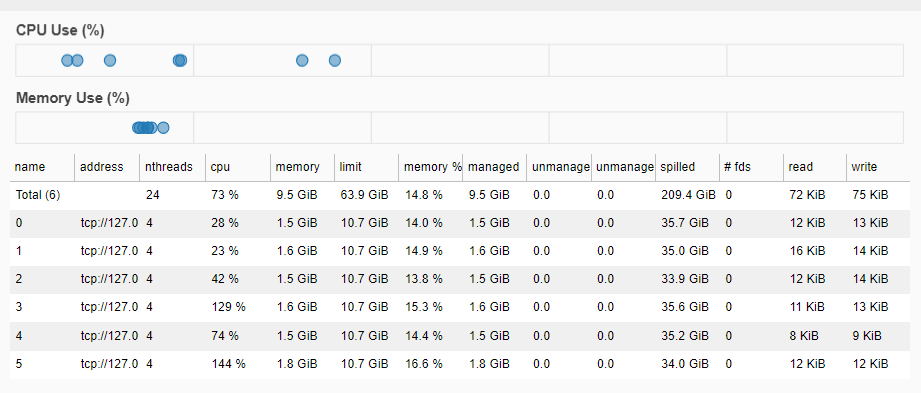

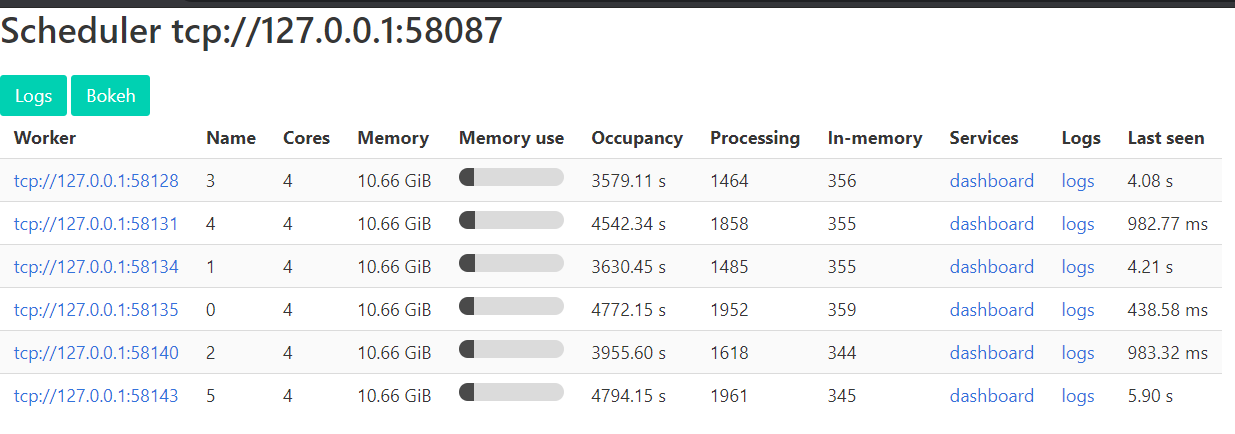

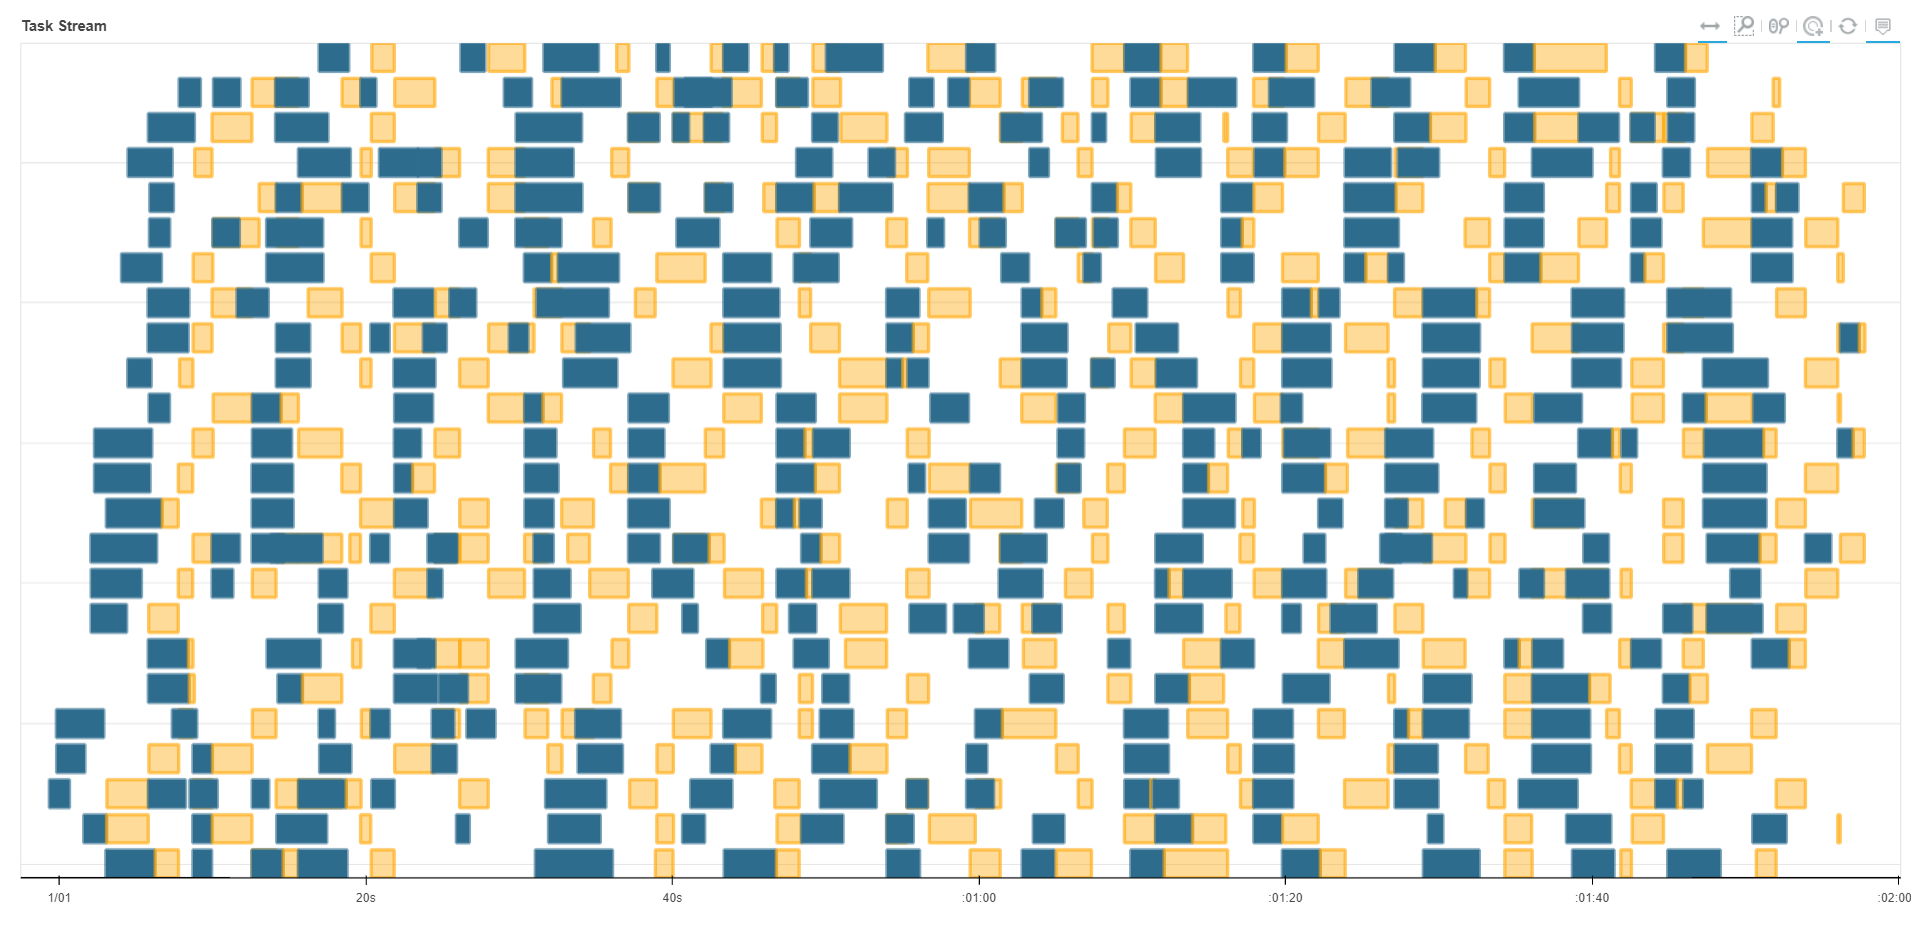

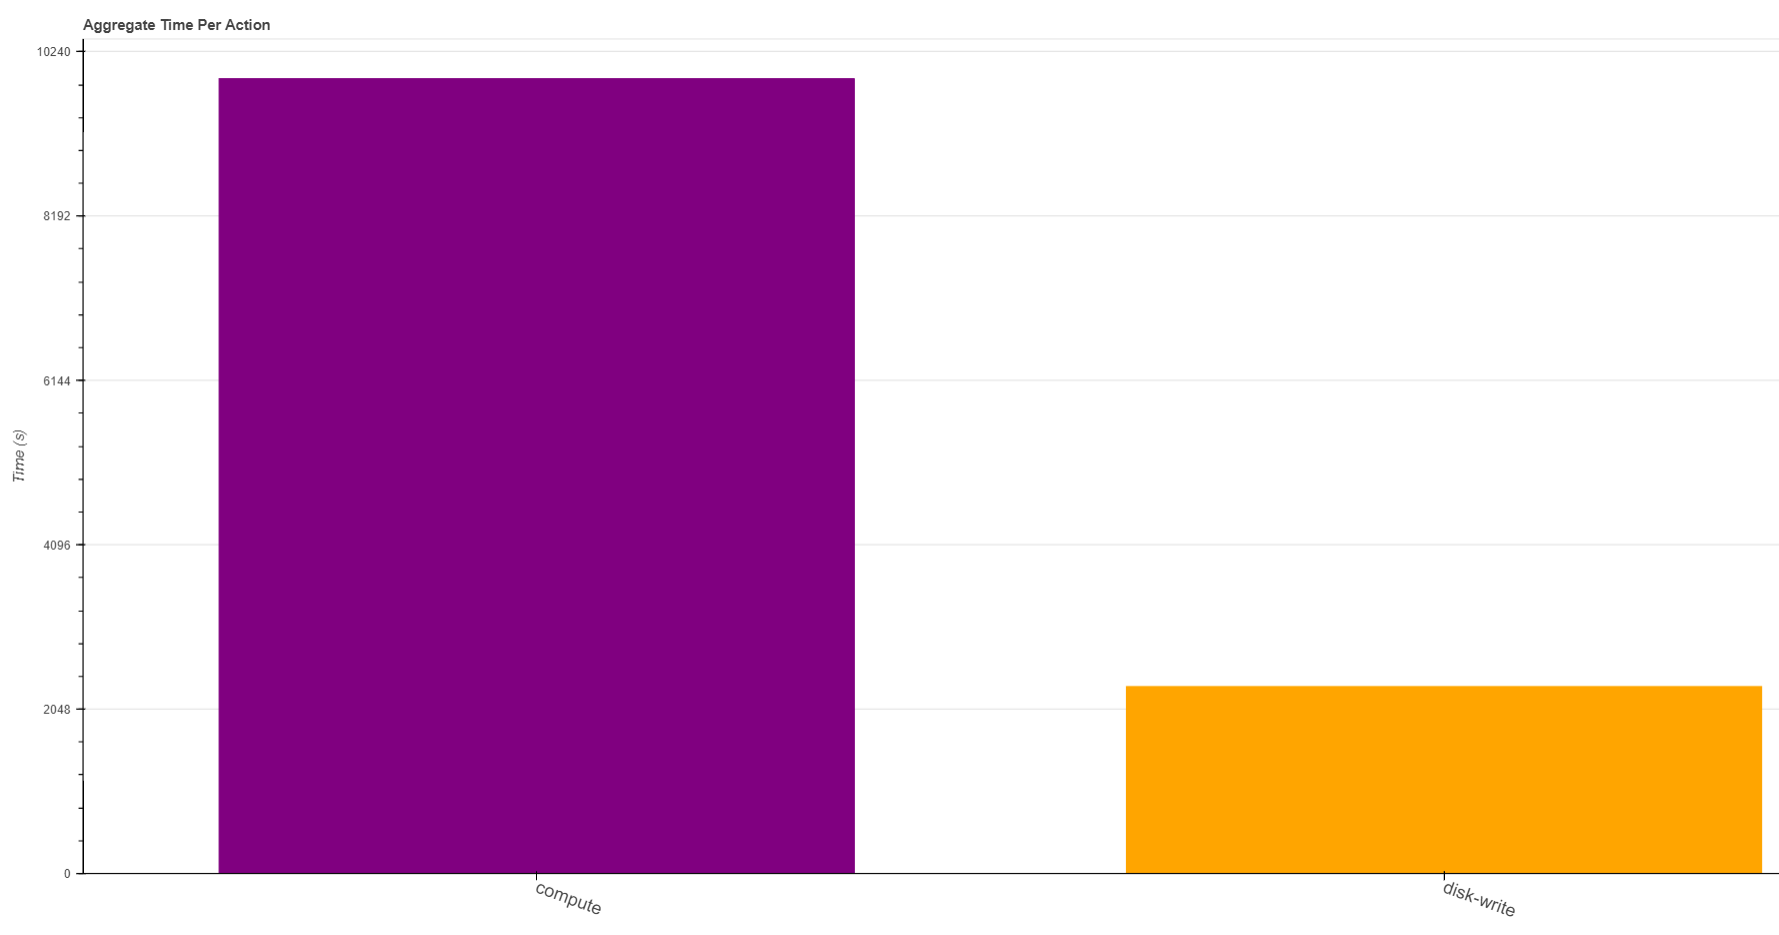

In [ ]:

#  len(df)   4 195 104 977 # over four billion rows of information ... holy moly 


In [ ]:

# df.timestamp.head()  
# for some odd reason, asking for a column (and not whole df.head() takes a lot longer, not sure why)


In [ ]:

# df.timestamp.tail()
# appears to take a really long time for some odd reason 


In [ ]:

# need to figure out if this huge file stopped being loaded by marchish 2021, but you can
# STILL use the api to find out the very very very latest values as of today !   

# figure this out 


In [ ]:

#  computed_df = df.compute()
#  type(computed_df)


In [ ]:

#  df = df.persist()  I DONT THINK YOU CAN DO THIS, YOU CAN'T PERSIST, TOO BIG ! 

# computer and then persist, or vice versa ? 


In [ ]:

type(df)  # not a normal dataframe ! 


In [254]:
df2.size

dd.Scalar<size-ag..., dtype=int32>

In [ ]:

# this is an example of a superfilter

# temp_df = df[ (df['sensor']=='hih6130') & (df['node_id']=='001e0610e532') & (df['subsystem']=='lightsense2') & (df['parameter']=='temperature') ]


In [ ]:
# use this snipped to filter on what you think you need: 

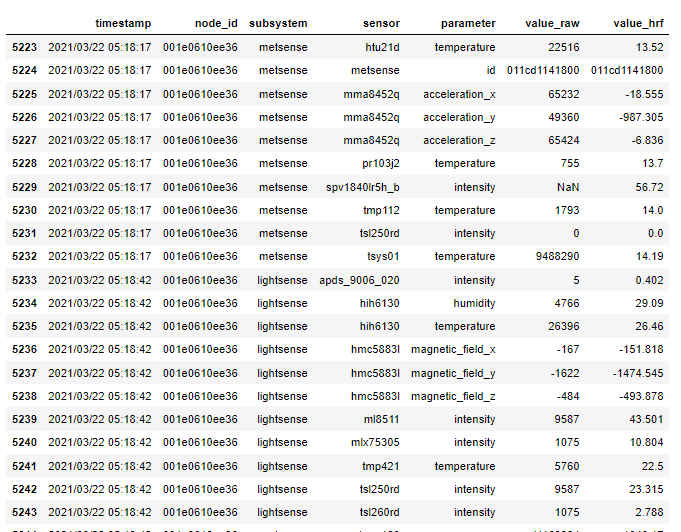

In [ ]:

single_sensor = df[ (df['node_id']=='001e0610ee36') ]

# if you 'compute' this, it will then be a pandas df, and then you can export...


In [ ]:
type(single_sensor)

In [ ]:

# i DONT think you have to convert to an actual single dataframe pandas, just export directly 

single_sensor.to_csv('single_sensor_exported_dask_dataframe_final.csv', single_file=True)


In [ ]:

# now in theory you have like a massive 2GB like CSV file potentially ... something big i think ! 

# but need to confirm 

# I THINK I SHOULD HAVE DONE THIS:
#     
#   df.to_csv("./tmp/my_single_file.csv", index=False, single_file=True)


In [255]:

# single_sensor_df = pd.read_csv('single_sensor_exported_dask_dataframe_final.csv')


In [256]:

# tempo = df[ (df['node_id']=='001e0610ee36') & (df['sensor']=='hih6130') & (df['parameter']=='temperature') & (df['subsystem']=='lightsense') ]

# if you 'compute' this, it will then be a pandas df, and then you can export...


In [257]:

# tempo = tempo.compute()


---

---

---

In [ ]:

# want to push this as its own dataframe into csv for usage and analysis later 

tempo.to_csv('exported_dataframe.csv', index = False, header=True)


In [258]:
# filtered_df = pd.read_csv('exported_dataframe.csv', 
#                           parse_dates=['timestamp'], 
#                           index_col='timestamp')

In [ ]:

filtered_df.dtypes

# looks right ! 


In [ ]:

type(filtered_df.index)
# THIS actually looks right ! ! ! 

# output:  pandas.core.indexes.datetimes.DatetimeIndex



In [ ]:

time_series_df = filtered_df['value_hrf']
time_series_df.head(10)


In [ ]:

time_series_df.plot(x="index", y="value_hrf"); 


In [ ]:

time_series_df.plot(); 


In [ ]:

time_series_df.loc['2020-01-01':'2020-02-01'].head(100)

# possible reading in the data messed it up ????


In [ ]:

time_series_df.loc['2019-09-01':'2019-09-02'].head(100)


In [ ]:
time_series_df.loc['2019-09-01':'2019-09-02'].plot(); 

In [ ]:

time_series_df.loc['2019-10-01':'2019-10-30'].plot(); 


In [ ]:

time_series_df.loc['2019-10-01':'2019-10-05'].plot(); 


In [ ]:

time_series_df.loc['2021-01-01':'2021-02-01'].plot(); 


In [ ]:

time_series_df.loc['2019-10-01':'2019-10-05'].plot(); 


In [ ]:

time_series_df.loc['2019-10-01':'2019-10-05'].plot(); 


In [ ]:

time_series_df.loc['2020-06-01':'2021-02-14'].plot(); 


In [ ]:

# overlay the line plot with the true weather seen in the area !  these are outdoor units ! 


In [ ]:

time_series_df.index[:300]


In [ ]:
time_series_df[:500].values

In [ ]:

# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_theme(style="darkgrid")

# x = time_series_df.index[20000:20050]
# # loc['2020-06-01':'2021-02-14']
# y = time_series_df[:500].values

# sns.lineplot(x,y)
# plt.show(); 



In [ ]:

# time_series_df.loc['2020-06-01':'2021-02-14'].plot(); 


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))

# time_series_df.loc['2019-10-01':'2019-10-05'].plot(); 

sns.lineplot(y = time_series_df.loc['2021-01-01':'2021-01-05'] , x  = time_series_df.loc['2021-01-01':'2021-01-05'].index.values); 



In [ ]:

plt.figure(figsize = (15,8))

sns.lineplot(y = time_series_df.loc['2021-01-01':'2021-01-25'] , x  = time_series_df.loc['2021-01-01':'2021-01-25'].index.values); 


In [ ]:

plt.figure(figsize = (15,8))

sns.lineplot(y = time_series_df.loc['2020-06-01':'2021-01-25'] , 
             x  = time_series_df.loc['2020-06-01':'2021-01-25'].index.values);


In [ ]:

plt.figure(figsize = (15,8))

sns.lineplot(y = time_series_df.loc['2021-01-01':'2021-01-10'].values , 
             x  = time_series_df.loc['2021-01-01':'2021-01-10'].index.values);


In [ ]:

plt.figure(figsize = (19,8))

sns.lineplot(y =  time_series_df.loc['2020-09-18':'2021-02-13'].values , 
             x  = time_series_df.loc['2020-09-18':'2021-02-13'].index.values);


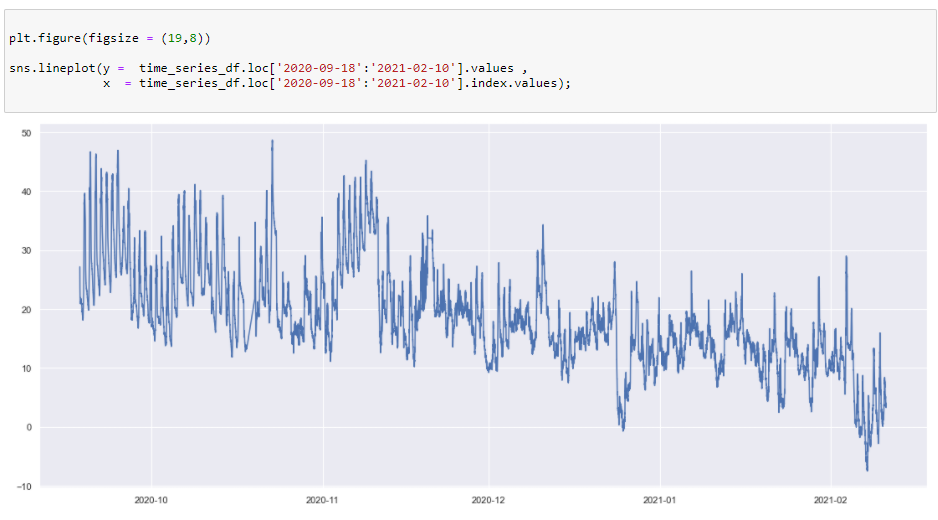

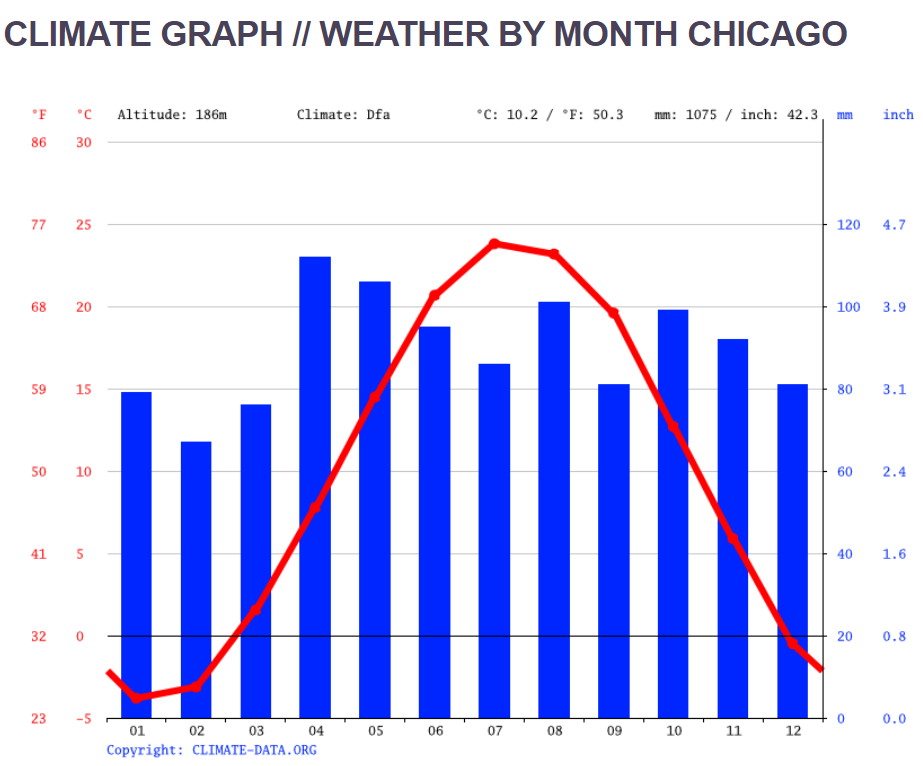

In [ ]:

plt.figure(figsize = (19,8))

sns.lineplot(y =  time_series_df.loc['2020-06-18':'2020-12-30'].values , 
             x  = time_series_df.loc['2020-06-18':'2020-12-30'].index.values);


#### 2020 Weather Temp - Chicago 

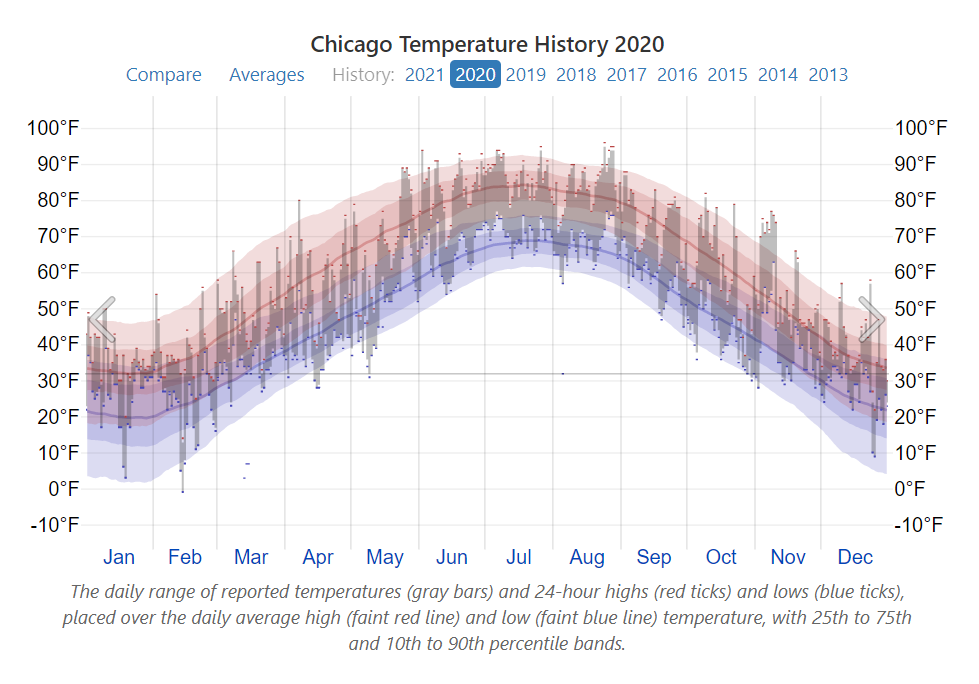

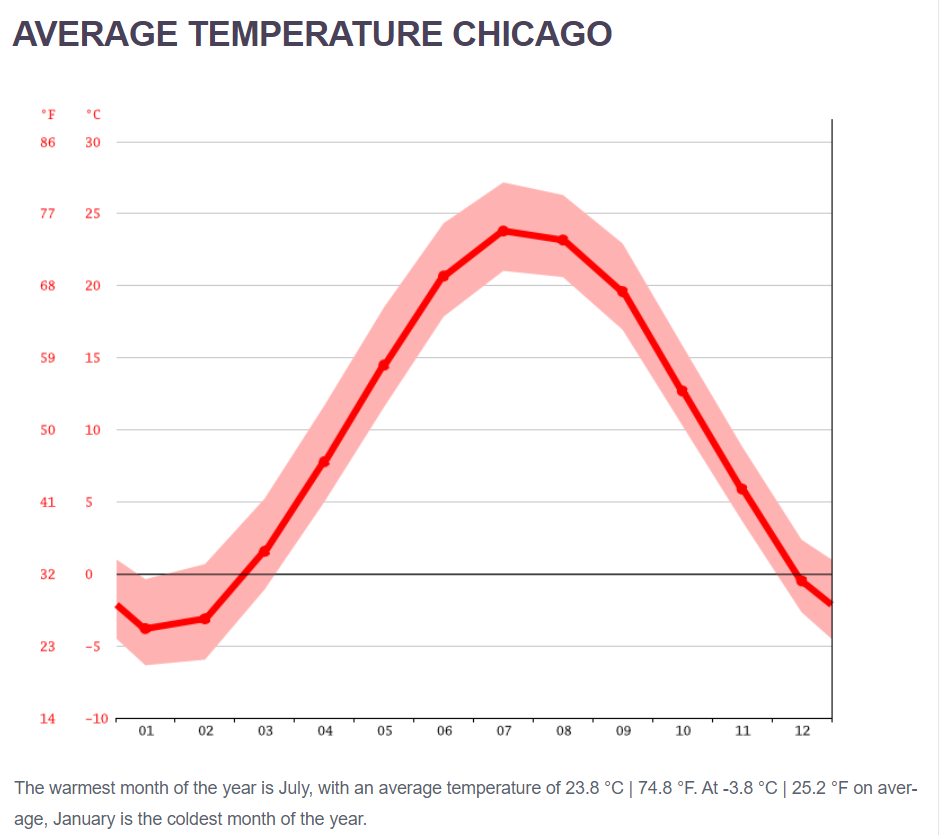

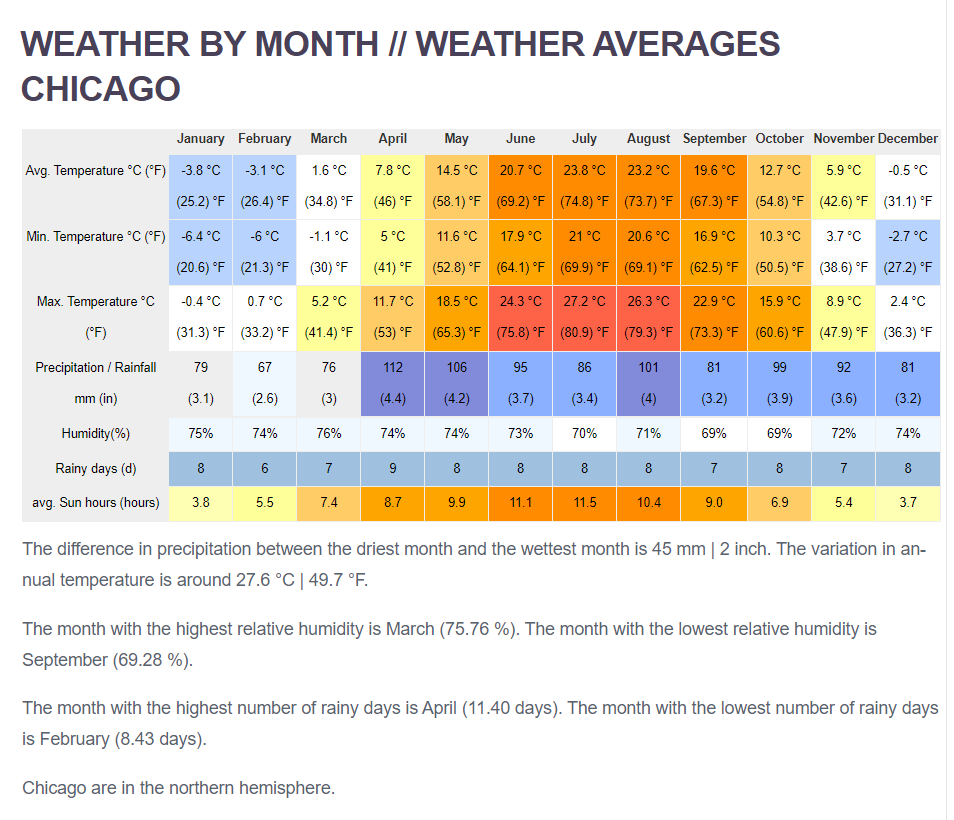

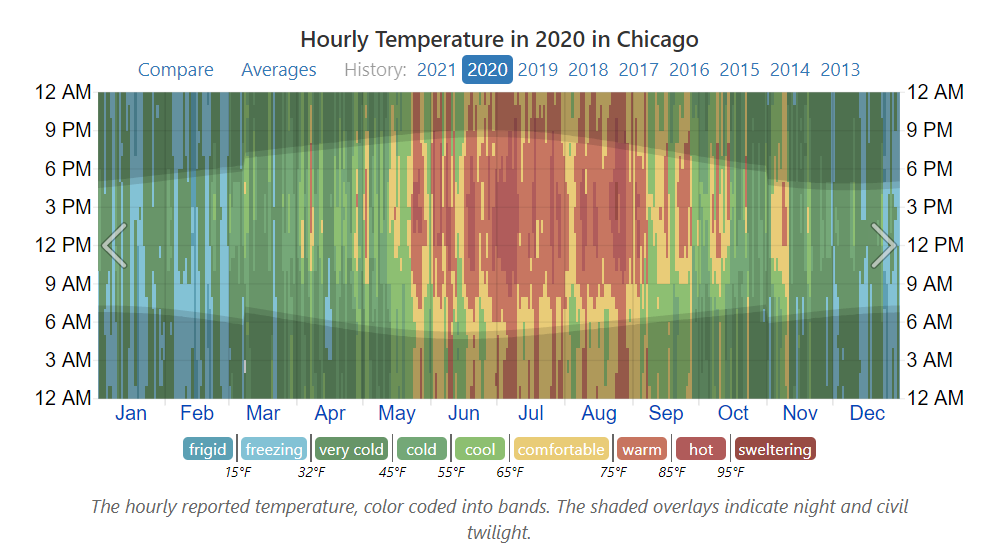

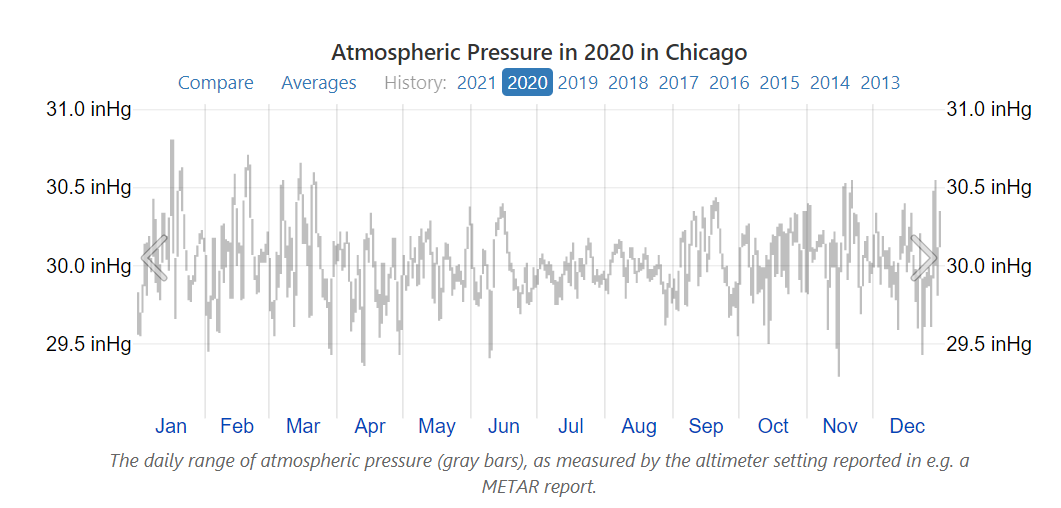

In [ ]:

# issues ? ? ? 

temp_df = df[ (df['sensor']=='hih6130') & (df['node_id']=='001e0610e532') & (df['subsystem']=='lightsense2') & (df['parameter']=='temperature') ].compute()
temp_df.head()


In [ ]:

#  df.isnull().sum().compute()
# df[df.quantity < 10].compute()


In [ ]:

df[ (df['sensor']=='hih6130') & (df['node_id']=='001e0610e532') & (df['subsystem']=='lightsense2') & (df['parameter']=='temperature') ].head(10)


In [ ]:

me = df[ (df['sensor']=='hih6130') & (df['node_id']=='001e0610e532') & (df['parameter']=='temperature') ].compute()

# rslt_df = dataframe[(dataframe['Age'] == 21) &
#           dataframe['Stream'].isin(options)]


In [ ]:

# seems to be taking forever ! ! ! 
#  len(df[ (df['sensor']=='hih6130') & (df['node_id']=='001e0610e532') & (df['parameter']=='temperature') ])


In [ ]:

#  print (df[ (df['sensor']=='hih6130') & (df['node_id']=='001e0610e532') & (df['parameter']=='temperature') ].count().compute())
